In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
le=LabelEncoder()
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
logreg=LogisticRegression()
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=15)
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import RFE
from boruta import BorutaPy
from sklearn.cluster import KMeans

In [ ]:
"""
the purpose of this project is to build a predictive machine learning classification model that can help the bank
company decide whether a loan appicant should be given the loan or not. The intent is to classify the customers as
good or bad depending on their credit history, eduction, marital status and some other variables to make an 
informed decision on whether to give a loan or not, which in the long run, will reduce loan retreival costs and
time.
"""

In [201]:
cr=pd.read_csv("C:/Users/geeta/Pythonstuff/CreditRisk.csv")
##prob statement: build a predictive model for loan status- should ban approve loan Y/N
## run sales campaign to target good customers

In [202]:
cr.LoanAmount=cr.LoanAmount.fillna(cr.LoanAmount.mean())
cr.Gender=cr.Gender.fillna("Male")
cr.Dependents=cr.Dependents.fillna(0)
cr.Self_Employed=cr.Self_Employed.fillna("Yes")
cr.Loan_Amount_Term=cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean())
cr.Credit_History=cr.Credit_History.fillna(0)
cr=cr.dropna()

In [ ]:
cr1.LoanAmount=cr1.LoanAmount.fillna(cr1.LoanAmount.mean())
cr1.Gender=cr1.Gender.fillna("Male")
cr1.Dependents=cr1.Dependents.fillna(0)
cr1.Self_Employed=cr1.Self_Employed.fillna("Yes")
cr1.Loan_Amount_Term=cr1.Loan_Amount_Term.fillna(cr1.Loan_Amount_Term.mean())
cr1.Credit_History=cr1.Credit_History.fillna(0)
cr1=cr1.dropna()

In [222]:
cr.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,142.51153,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.00000,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.00000,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.00000,360.0,1.0,2,1


In [205]:
##label encoder
cr[cr.select_dtypes(include=['object']).columns]=cr[cr.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [204]:
le=LabelEncoder()

In [203]:
cr=cr.drop(["Loan_ID"], axis=1)

In [223]:
cr.shape

(978, 12)

In [206]:
cr_x=cr.iloc[:,0:11]
cr_y=cr.iloc[:,11]

In [207]:
cr_x_train, cr_x_test, cr_y_train, cr_y_test= train_test_split(cr_x, cr_y, test_size=0.2)

In [208]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [209]:
logreg.fit(cr_x_train, cr_y_train)

c:\programdata\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [210]:
pred_value=logreg.predict(cr_x_test)
pred_value

array([1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0])

In [211]:
from sklearn.metrics import confusion_matrix

tab1=confusion_matrix(pred_value, cr_y_test)
tab1

array([[ 21,  10],
       [ 24, 141]], dtype=int64)

In [212]:
accuracy=tab1.diagonal().sum()/tab1.sum() * 100
accuracy

82.6530612244898

In [213]:
total1=sum(sum(tab1))
accuracy1=(tab1[0,0]+tab1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = tab1[0,0]/(tab1[0,0]+tab1[1,0])
print('Sensitivity : ', sensitivity1 )

specificity1 = tab1[1,1]/(tab1[0,1]+tab1[1,1])
print('Specificity : ', specificity1)

f1score=tab1[0,0]/(tab1[0,0]+(1/2)*(tab1[1,0]+tab1[0,1]))
print('f1score:',f1score)

precision=tab1[0,0]/(tab1[0,0]+tab1[0,1])
print('precision:', precision)

Accuracy :  0.826530612244898
Sensitivity :  0.4666666666666667
Specificity :  0.9337748344370861
f1score: 0.5526315789473685
precision: 0.6774193548387096


In [214]:
## getting probabilities instead of 0/1 values

pred_value_prob=logreg.predict_proba(cr_x_test)
pred_value_prob

array([[0.18613144, 0.81386856],
       [0.15351535, 0.84648465],
       [0.12309288, 0.87690712],
       [0.0464819 , 0.9535181 ],
       [0.57619469, 0.42380531],
       [0.54573252, 0.45426748],
       [0.53262334, 0.46737666],
       [0.15346408, 0.84653592],
       [0.11212087, 0.88787913],
       [0.0633649 , 0.9366351 ],
       [0.15923551, 0.84076449],
       [0.2597494 , 0.7402506 ],
       [0.13423918, 0.86576082],
       [0.22276598, 0.77723402],
       [0.08260604, 0.91739396],
       [0.25930729, 0.74069271],
       [0.67485975, 0.32514025],
       [0.17837088, 0.82162912],
       [0.18470591, 0.81529409],
       [0.2858109 , 0.7141891 ],
       [0.1171733 , 0.8828267 ],
       [0.1854167 , 0.8145833 ],
       [0.24969303, 0.75030697],
       [0.23958662, 0.76041338],
       [0.1103494 , 0.8896506 ],
       [0.19884223, 0.80115777],
       [0.63862729, 0.36137271],
       [0.61183125, 0.38816875],
       [0.16701893, 0.83298107],
       [0.20061785, 0.79938215],
       [0.

In [ ]:
len(pred_value_prob)

In [ ]:
pred_prob_full=logreg.predict_proba(cr_x)
pred_prob_full

In [ ]:
len(pred_prob_full)

In [ ]:
pred_prob_full=pd.DataFrame(pred_prob_full)

In [ ]:
pred_prob_full.head()

In [ ]:
prob_id=pd.DataFrame({"Loan_Id":cr1.Loan_ID, "Probability":pred_prob_full.iloc[:,1]})

In [ ]:
prob_id.head()

In [ ]:
prob_id=prob_id.sort_values("Probability", ascending=False)

In [215]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [216]:
roc_score=roc_auc_score(pred_value, cr_y_test)
roc_score

0.7659824046920821

In [217]:
pred_value_prob=pd.DataFrame(pred_value_prob)


In [218]:
fpr,tpr,threshold= roc_curve(cr_y_test, pred_value_prob.iloc[:,1])

In [219]:
fpr

array([0.        , 0.        , 0.        , 0.02222222, 0.02222222,
       0.06666667, 0.06666667, 0.08888889, 0.08888889, 0.11111111,
       0.11111111, 0.13333333, 0.13333333, 0.15555556, 0.15555556,
       0.17777778, 0.17777778, 0.2       , 0.2       , 0.22222222,
       0.22222222, 0.24444444, 0.24444444, 0.31111111, 0.31111111,
       0.35555556, 0.35555556, 0.37777778, 0.37777778, 0.4       ,
       0.4       , 0.44444444, 0.44444444, 0.46666667, 0.46666667,
       0.51111111, 0.51111111, 0.53333333, 0.53333333, 0.55555556,
       0.55555556, 0.57777778, 0.57777778, 0.71111111, 0.71111111,
       0.77777778, 0.77777778, 0.8       , 0.8       , 0.82222222,
       0.82222222, 0.84444444, 0.84444444, 1.        ])

In [220]:
tpr

array([0.        , 0.00662252, 0.05298013, 0.05298013, 0.07284768,
       0.07284768, 0.10596026, 0.10596026, 0.14569536, 0.14569536,
       0.35099338, 0.35099338, 0.47019868, 0.47019868, 0.52980132,
       0.52980132, 0.56953642, 0.56953642, 0.57615894, 0.57615894,
       0.68211921, 0.68211921, 0.7218543 , 0.7218543 , 0.72847682,
       0.72847682, 0.75496689, 0.75496689, 0.82781457, 0.82781457,
       0.83443709, 0.83443709, 0.87417219, 0.87417219, 0.89403974,
       0.89403974, 0.9205298 , 0.9205298 , 0.93377483, 0.93377483,
       0.94039735, 0.94039735, 0.95364238, 0.95364238, 0.9602649 ,
       0.9602649 , 0.96688742, 0.96688742, 0.97350993, 0.97350993,
       0.98013245, 0.98013245, 1.        , 1.        ])

Text(0.4, 0.6, 'ROC value is 0.76')

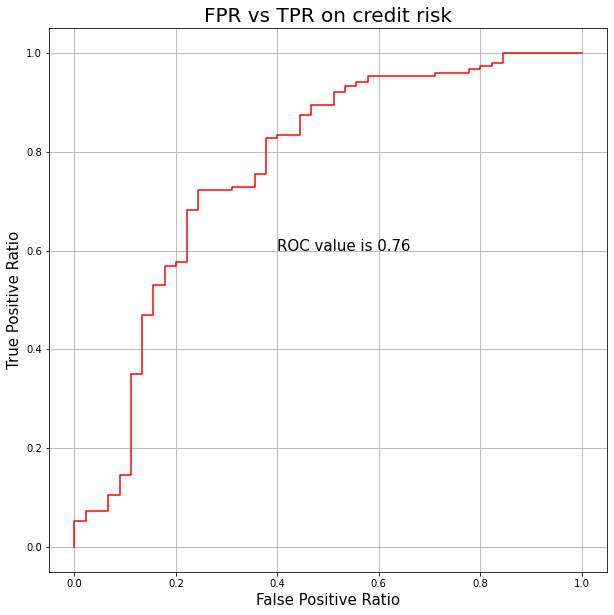

In [221]:
plt.figure(figsize=(10,10))
plt.plot(fpr,tpr, color="red")
plt.xlabel("False Positive Ratio", size=15)
plt.ylabel("True Positive Ratio", size=15)
plt.title("FPR vs TPR on credit risk", size= 20)
plt.grid()
plt.text(x=.4, y=.6, s="ROC value is 0.76", size=15)

In [ ]:
logreg.coef_

In [ ]:
logreg.intercept_

In [ ]:
from sklearn.metrics import f1_score
f1=f1_score(cr_y_test, pred_value)
f1

In [ ]:
from sklearn.ensemble import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(cr_x_train, cr_y_train)
pred_dt=dt.predict(cr_x_test)

In [ ]:
tab_dt=confusion_matrix(pred_dt,cr_y_test)
tab_dt

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
import sklearn.ensemble

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()

In [ ]:
search_dict= {"criterion":["gini", "entropy"],
             "max_depth":range(3,10),
             "min_samples_split":range(25,50)}

In [ ]:
grid=GridSearchCV(dtree, param_grid=search_dict)

In [ ]:
grid.fit(cr_x_train, cr_y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.fit(cr_x_train, cr_y_train)
pred_grid=grid.predict(cr_x_test)

In [ ]:
tab_grid=confusion_matrix(pred_dt,cr_y_test)
tab_grid

In [ ]:
tab_grid.diagonal().sum()/tab_grid.sum()

In [ ]:
grid=GridSearchCV(dtree, param_grid=search_dict,
                 cv=10, verbose=2)

In [ ]:
grid.fit(cr_x_train, cr_y_train)

In [ ]:
grid.fit(cr_x_train, cr_y_train)
pred_grid=grid.predict(cr_x_test)

In [ ]:
tab_dt.diagonal().sum()/tab_dt.sum()*100

In [ ]:
#array([[ 20,  26],
#       [ 30, 120]], dtype=int64)
#class_weight="balanced"
#criterion="entropy"
#max_depth=4

In [ ]:
dt.feature_importances_

In [ ]:
importance_score=pd.DataFrame({"features":cr_x_train.columns, "Importance":dt.feature_importances_})
importance_score.sort_values("Importance", ascending=False)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [ ]:
rf.fit(cr_x_train, cr_y_train)
pred_rf=rf.predict(cr_x_test)
tab_rf=confusion_matrix(pred_rf, cr_y_test)
tab_rf

In [ ]:
rf.feature_importances_

In [ ]:
featureimp=pd.DataFrame({"Features":cr_x_train.columns, "Importance":rf.feature_importances_})
featureimp.sort_values("Importance", ascending=False)

In [ ]:
search_dict_rf={"criterion":["gini","entropy"],
               "max_depth":range(8,10),
               "min_samples_split":range(30,33),
               "n_estimators":[100,200]}

In [ ]:
grid=GridSearchCV(rf, param_grid=search_dict_rf)

In [ ]:
grid.fit(cr_x_train, cr_y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.fit(cr_x_train, cr_y_train)
pred_grid=grid.predict(cr_x_test)

In [ ]:
tab_grid=confusion_matrix(pred_grid,cr_y_test)
tab_grid

In [ ]:
tab_dt.diagonal().sum()/tab_dt.sum()*100

In [ ]:
# for decision tree visual
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
import pydot

In [ ]:
from six import StringIO

In [ ]:
cr_x_train_names=cr_x_train.columns
dot_data=StringIO()
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(12,12))

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names=cr_x_train_names)
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
(graph,)=pydot.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

In [ ]:
cr_x_train_names=pd.DataFrame(cr_x_train.columns)
cr_x_train_names
cr_x_train.columns

In [ ]:
cr_x_train_names=cr_x_train.columns

In [ ]:
cr_x_train_names  = cr_x_train.columns
dot_data = StringIO() 


import matplotlib.pyplot as plt
fig= plt.figure(figsize=(12,12))

export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True , feature_names=cr_x_train_names  )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
dt

In [ ]:
conda install graphviz

In [ ]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes=MultinomialNB()

In [ ]:
from sklearn.metrics import confusion_matrix
naive_bayes.fit(cr_x_train, cr_y_train)
pred_nb=naive_bayes.predict(cr_x_test)

tab_nb=confusion_matrix(pred_nb, cr_y_test)
tab_nb

In [ ]:
tab_nb.diagonal().sum()/tab_nb.sum()*100

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(cr_x_train, cr_y_train)
pred_knn=knn.predict(cr_x_test)
tab_knn=confusion_matrix(pred_knn, cr_y_test)
tab_knn

In [ ]:
acc=tab_knn.diagonal().sum()/tab_knn.sum()
acc

In [ ]:
lst=[]
i=1
for i in range(1,51):
    
    kn=KNeighborsClassifier(n_neighbors=i)
    kn.fit(cr_x_train, cr_y_train)
    pred_kn=kn.predict(cr_x_test)
    tab_kn=confusion_matrix(pred_kn, cr_y_test)
    acc=tab_kn.diagonal().sum()/tab_kn.sum()
    lst.append(acc)

In [ ]:
l=[]
for i in range (1,51):
    l.append(i)

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(lst,color='r')
plt.grid(linestyle="--")

In [ ]:
l

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
svc=LinearSVC()

In [ ]:
svc.fit(cr_x_train, cr_y_train)
pred_svc=svc.predict(cr_x_test)
tab_svc=confusion_matrix(pred_svc, cr_y_test)
tab_svc

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=15)

In [ ]:
abc.fit(cr_x_train, cr_y_train)
pred_abc=abc.predict(cr_x_test)
tab_abc=confusion_matrix(pred_abc, cr_y_test)
tab_abc

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
dtree=DecisionTreeClassifier(class_weight="balanced" )
rfc=RandomForestClassifier(class_weight="balanced" )
svc_model=SVC()
naive_bayes=MultinomialNB()
log_reg=LogisticRegression()
abc=AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=15)

In [ ]:
vc=VotingClassifier(estimators=[("dtree",dtree), ("rfc", rfc), ("svc_model",svc_model),
                                ("log_reg",log_reg),("naive_bayes", naive_bayes),("abc",abc)],
                    voting="hard")
vc.fit(cr_x_train, cr_y_train)
pred_vc=vc.predict(cr_x_test)
                    

In [ ]:
tab_vc=confusion_matrix(pred_vc, cr_y_test)
tab_vc

In [ ]:
rf=RandomForestClassifier()
from boruta import BorutaPy
cr_xx=np.array(cr_x)
cr_yy=np.array(cr_y)
boruta_feature_selector= BorutaPy(rf, max_iter=50, verbose=2)
boruta_feature_selector.fit(cr_xx, cr_yy)

In [ ]:
boruta_feature_selector.support_

In [ ]:

df2=pd.DataFrame({"Feature":cr_x.columns,"estimate": boruta_feature_selector.support_})
df2

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
#dt.fit(cr_x_train, cr_y_train)
rfe_dt=RFE(dt,5)
rfe_dt.fit(cr_x,cr_y)
rfe_dt.support_

In [ ]:

df3=pd.DataFrame({"Feature":cr_x.columns,"estimate": rfe_dt.support_})
df3

In [ ]:
#Dependents,ApplicantIncome, CoapplicantIncome, LoanAmount, Credit_History

In [ ]:
# #Recursive Feature Elimination (RFE) as its title suggests recursively removes features, 
# #builds a model using the remaining attributes and calculates model accuracy. 
# #RFE is able to work out the combination of attributes that contribute to the prediction on the target variable (or class)

In [ ]:
## Ridge and lasso: regularization and generalization technique used to overcome overfitting
## overfitting:complex model gives good result on train data, not good on test or unforseen data
## lasso can be used for feature selection, ridge cannot; cos few betas can become 0
## in ridge, betas do not become 0
## both can be used for problem of multicolinearity ny shrinking betas
##

In [ ]:
from sklearn.model_selection import cross_val_score
cross_val=cross_val_score(dt, cr_x_train, cr_y_train, cv=7, scoring="accuracy")

In [ ]:
cross_val.max()

In [ ]:
cross_val.min()

In [ ]:
cross_val.mean()

In [184]:
cr=pd.read_csv("C:/Users/geeta/Pythonstuff/CreditRisk.csv")

In [185]:
cr.LoanAmount=cr.LoanAmount.fillna(cr.LoanAmount.mean())
cr.Gender=cr.Gender.fillna("Male")
cr.Dependents=cr.Dependents.fillna(0)
cr.Self_Employed=cr.Self_Employed.fillna("Yes")
cr.Loan_Amount_Term=cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean())
cr.Credit_History=cr.Credit_History.fillna(0)
cr=cr.dropna()

In [186]:
cr=cr.drop(["Loan_ID"], axis=1)

In [187]:
le=LabelEncoder()
cr[cr.select_dtypes(include=['object']).columns]=cr[cr.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [188]:
cr_train, cr_test= train_test_split(cr, test_size=0.2)

In [189]:
cr.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,142.51153,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.00000,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.00000,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.00000,360.0,1.0,2,1


In [224]:
cr_train.Loan_Status.value_counts()

0    627
1    573
Name: Loan_Status, dtype: int64

In [191]:
df1=cr_train[cr_train.Loan_Status==0 ]
df2=cr_train[cr_train.Loan_Status==1 ]
df2.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
227,1,1,2.0,0,0,6250,1695.0,210.0,360.0,1.0,1,1
947,0,1,0.0,0,0,4709,0.0,113.0,360.0,1.0,1,1
760,1,0,0.0,1,0,3276,0.0,90.0,360.0,1.0,1,1
623,1,0,0.0,1,0,2400,2400.0,123.0,360.0,1.0,1,1
628,0,0,0.0,0,0,4666,0.0,124.0,360.0,1.0,1,1


In [192]:
cr_train=pd.concat([cr_train, df1,df1], axis=0)

In [193]:
cr_x_train=cr_train.iloc[:, 0:11]
cr_y_train=cr_train.iloc[:,11]

cr_x_test=cr_test.iloc[:,0:11]
cr_y_test=cr_test.iloc[:,11]



In [194]:
print(cr_x_train.shape)
print(cr_y_train.shape)

(1200, 11)
(1200,)


In [195]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [196]:
logreg.fit(cr_x_train, cr_y_train)

c:\programdata\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [197]:
pred_value=logreg.predict(cr_x_test)


In [198]:
tab1=confusion_matrix(pred_value, cr_y_test)
tab1

array([[ 42,  23],
       [ 18, 113]], dtype=int64)

In [199]:
accuracy=tab1.diagonal().sum()/tab1.sum() * 100
accuracy

79.08163265306123

In [200]:
total1=sum(sum(tab1))
accuracy1=(tab1[0,0]+tab1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = tab1[0,0]/(tab1[0,0]+tab1[1,0])
print('Sensitivity : ', sensitivity1 )

specificity1 = tab1[1,1]/(tab1[0,1]+tab1[1,1])
print('Specificity : ', specificity1)

f1score=tab1[0,0]/(tab1[0,0]+(1/2)*(tab1[1,0]+tab1[0,1]))
print('f1score:',f1score)

precision=tab1[0,0]/(tab1[0,0]+tab1[0,1])
print('precision:', precision)

Accuracy :  0.7908163265306123
Sensitivity :  0.7
Specificity :  0.8308823529411765
f1score: 0.672
precision: 0.6461538461538462


In [ ]:
#tp/tp+1/2(fp+fn)
#tp(tp+fp)

Accuracy :  0.7806122448979592
Sensitivity :  0.7142857142857143
Specificity :  0.7916666666666666
f1score: 0.4819277108433735


array([[ 20,   8],
       [ 35, 133]], dtype=int64)

In [ ]:
print("Accuracy :  0.8010204081632653, Sensitivity :  0.52, Specificity :  0.8972602739726028")
print("f1score: 0.5714285714285714, precision: 0.6341463414634146")


In [ ]:


######################################

In [229]:


cr=pd.read_csv("C:/Users/geeta/Pythonstuff/CreditRisk.csv")

In [230]:
cr.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [231]:
cr.LoanAmount=cr.LoanAmount.fillna(cr.LoanAmount.mean())
cr.Gender=cr.Gender.fillna("Male")
cr.Dependents=cr.Dependents.fillna(0)
cr.Self_Employed=cr.Self_Employed.fillna("Yes")
cr.Loan_Amount_Term=cr.Loan_Amount_Term.fillna(cr.Loan_Amount_Term.mean())
cr.Credit_History=cr.Credit_History.fillna(0)
cr=cr.dropna()

In [232]:
cr=cr.drop(["Loan_ID"], axis=1)

In [233]:
#Dependents,ApplicantIncome, CoapplicantIncome, LoanAmount, Credit_History
#cr=cr.drop(["Gender"], axis=1)
#cr=cr.drop(["Married"], axis=1)
#cr=cr.drop(["Education"], axis=1)
#cr=cr.drop(["Self_Employed"], axis=1)
#cr=cr.drop(["Loan_Amount_Term"], axis=1)
#cr=cr.drop(["Property_Area"], axis=1)


In [234]:
le=LabelEncoder()
cr[cr.select_dtypes(include=['object']).columns]=cr[cr.select_dtypes(include=['object']).columns].apply(le.fit_transform)

In [265]:
cr_train, cr_test= train_test_split(cr, test_size=0.2)

In [266]:
cr_train.Loan_Status.value_counts()

1    568
0    214
Name: Loan_Status, dtype: int64

In [267]:
df1=cr_train[cr_train.Loan_Status==0 ]
df2=cr_train[cr_train.Loan_Status==1 ]
df2.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
427,1,1,2.0,0,0,5935,0.0,133.0,360.000000,1.0,1,1
690,1,1,0.0,0,0,3189,2367.0,186.0,360.000000,1.0,2,1
566,1,0,0.0,0,0,3333,0.0,70.0,360.000000,1.0,2,1
840,1,1,0.0,0,0,2553,1768.0,102.0,360.000000,1.0,2,1
165,1,1,0.0,0,0,3707,3166.0,182.0,342.201873,1.0,0,1


In [268]:
cr_train=pd.concat([cr_train, df1,df1], axis=0)


In [269]:
cr_x_train=cr_train.iloc[:, 0:11]
cr_y_train=cr_train.iloc[:, 11]

cr_x_test=cr_test.iloc[:,0:11]
cr_y_test=cr_test.iloc[:,11]


In [270]:
cr_y_test.head()

657    1
58     1
874    1
629    1
324    1
Name: Loan_Status, dtype: int32

In [271]:
print(cr_x_train.shape)
print(cr_y_train.shape)

(1210, 11)
(1210,)


In [272]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [273]:
logreg.fit(cr_x_train, cr_y_train)

c:\programdata\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [274]:
pred_value=logreg.predict(cr_x_test)


In [275]:
tab1=confusion_matrix(pred_value, cr_y_test)
tab1

array([[ 39,  17],
       [ 16, 124]], dtype=int64)

In [276]:
accuracy=tab1.diagonal().sum()/tab1.sum() * 100
accuracy

83.16326530612244

In [277]:
total1=sum(sum(tab1))
accuracy1=(tab1[0,0]+tab1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = tab1[0,0]/(tab1[0,0]+tab1[1,0])
print('Sensitivity : ', sensitivity1 )

specificity1 = tab1[1,1]/(tab1[0,1]+tab1[1,1])
print('Specificity : ', specificity1)

f1score=tab1[0,0]/(tab1[0,0]+(1/2)*(tab1[1,0]+tab1[0,1]))
print('f1score:',f1score)

precision=tab1[0,0]/(tab1[0,0]+tab1[0,1])
print('precision:', precision)

Accuracy :  0.8316326530612245
Sensitivity :  0.7090909090909091
Specificity :  0.8794326241134752
f1score: 0.7027027027027027
precision: 0.6964285714285714


In [257]:
from sklearn.metrics import classification_report

In [258]:
print(classification_report(pred_value, cr_y_test))

              precision    recall  f1-score   support

           0       0.67      0.60      0.63        60
           1       0.83      0.87      0.85       136

    accuracy                           0.79       196
   macro avg       0.75      0.73      0.74       196
weighted avg       0.78      0.79      0.78       196



In [259]:
import pickle

In [261]:
with open('cr_reg','wb') as f:
    pickle.dump(logreg, f)

In [262]:
with open('cr_reg', 'rb') as f:
    logreg_new=pickle.load(f)

In [263]:
pred_value=logreg_new.predict(cr_x_test)

In [264]:
tab1=confusion_matrix(pred_value, cr_y_test)
tab1

array([[ 36,  24],
       [ 18, 118]], dtype=int64)

In [279]:
from scipy.stats import ttest_1samp

In [284]:
cr.ApplicantIncome.mean()

5176.644171779141

In [281]:
cr.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,142.51153,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.00000,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.00000,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.00000,360.0,1.0,2,1


In [297]:
result=ttest_1samp(cr.ApplicantIncome, 5550)

In [298]:
if result[1]>0.05:
    print('value is greater than  0.05:', result[1],'we fail to reject the null hypo')
else:
    print('value is lesser than 0.05:', result[1],'we reject the null hypo')

value is lesser than 0.05: 0.040840382319724956 we reject the null hypo


# ANOVA

In [299]:
from scipy.stats import f_oneway

In [301]:
restaurant=pd.read_csv("C:/Users/geeta/Pythonstuff/restuarnt.csv")

In [302]:
restaurant

,samosa,Vada,PauBaji
0,21,49,15
1,41,56,23
2,43,17,21
3,55,48,25
4,45,43,34
5,37,32,39
6,29,33,30


In [308]:
f_oneway(restaurant.PauBaji, restaurant.Vada, restaurant.samosa)

F_onewayResult(statistic=3.0078196272644337, pvalue=0.07464576690389685)

In [309]:
cr.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,5849,0.0,142.51153,360.0,1.0,2,1
1,1,1,1.0,0,0,4583,1508.0,128.00000,360.0,1.0,0,0
2,1,1,0.0,0,1,3000,0.0,66.00000,360.0,1.0,2,1
3,1,1,0.0,1,0,2583,2358.0,120.00000,360.0,1.0,2,1
4,1,0,0.0,0,0,6000,0.0,141.00000,360.0,1.0,2,1


In [314]:
f_oneway(cr.Education[cr.Education==1],cr.ApplicantIncome)

F_onewayResult(statistic=179.52281062962243, pvalue=3.0646969239520806e-38)

In [313]:
cr.Education[cr.Education==1]


3      1
6      1
16     1
18     1
20     1
      ..
961    1
962    1
968    1
972    1
976    1
Name: Education, Length: 218, dtype: int32

In [324]:
f_oneway(cr.ApplicantIncome[cr.Education==0],cr.ApplicantIncome[cr.Education==1])

F_onewayResult(statistic=19.152689047000063, pvalue=1.3366348451543963e-05)

In [322]:
result=ttest_1samp(cr.ApplicantIncome[cr.Education==0], cr.ApplicantIncome.mean())
result

Ttest_1sampResult(statistic=1.851337331136878, pvalue=0.06450929152220944)

In [320]:
result1=ttest_1samp(cr.ApplicantIncome[cr.Education==1], cr.ApplicantIncome.mean())
result1

Ttest_1sampResult(statistic=-10.274468542804621, pvalue=1.9621248710319628e-20)

In [325]:
f_oneway(cr.ApplicantIncome[cr.Gender==0],cr.ApplicantIncome[cr.Gender==1])

F_onewayResult(statistic=3.8401580569578604, pvalue=0.05032308915055356)

In [326]:
f_oneway(cr.ApplicantIncome[cr.Married==0],cr.ApplicantIncome[cr.Married==1])

F_onewayResult(statistic=2.623926073562529, pvalue=0.10558674253304844)

In [327]:
crr=pd.read_csv("C:/Users/geeta/Pythonstuff/CreditRisk.csv")

In [333]:
abc=pd.crosstab(cr.Loan_Status, cr.Credit_History)

In [334]:
abc

Credit_History,0.0,1.0
Loan_Status,,
0,155,114
1,72,637


In [336]:
from scipy.stats import chi2_contingency
chi2_contingency(abc)

(243.85194528383963,
 5.686391460782726e-55,
 1,
 array([[ 62.43660532, 206.56339468],
        [164.56339468, 544.43660532]]))